# Correlation and exploration

#### This notebook uses samples published elsewhere, that use the mtcars dataset
mtcars {datasets}	R Documentation
## Motor Trend Car Road Tests
###Description
The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

### Usage
mtcars
### Format
A data frame with 32 observations on 11 (numeric) variables.

 - [, 1]	mpg	Miles/(US) gallon
 - [, 2]	cyl	Number of cylinders
 - [, 3]	disp	Displacement (cu.in.)
 - [, 4]	hp	Gross horsepower
 - [, 5]	drat	Rear axle ratio
 - [, 6]	wt	Weight (1000 lbs)
 - [, 7]	qsec	1/4 mile time
 - [, 8]	vs	Engine (0 = V-shaped, 1 = straight)
 - [, 9]	am	Transmission (0 = automatic, 1 = manual)
 - [,10]	gear	Number of forward gears
 - [,11]	carb	Number of carburetors
### Note
Henderson and Velleman (1981) comment in a footnote to Table 1: ‘Hocking [original transcriber]'s noncrucial coding of the Mazda's rotary engine as a straight six-cylinder engine and the Porsche's flat engine as a V engine, as well as the inclusion of the diesel Mercedes 240D, have been retained to enable direct comparisons to be made with previous analyses.’

### Source
Henderson and Velleman (1981), Building multiple regression models interactively. Biometrics, 37, 391–411.

[Package datasets version 4.2.2 ]

In [1]:
#?mtcars

In [2]:
library(tidyverse)
library(corrplot)
library(GGally)
library(ggExtra)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



https://cran.r-project.org/web/packages/explore/vignettes/explore_mtcars.html


## Scatter Plot Matrix using base R

As there are 11 variables, the plot will be big, so I'm resizing my plot to 12 x 12.  
### Notes:  
 - If the dataset is very big, cut down on the number of variables being plotted or it will take forever
 - Only numeric variables can be used.

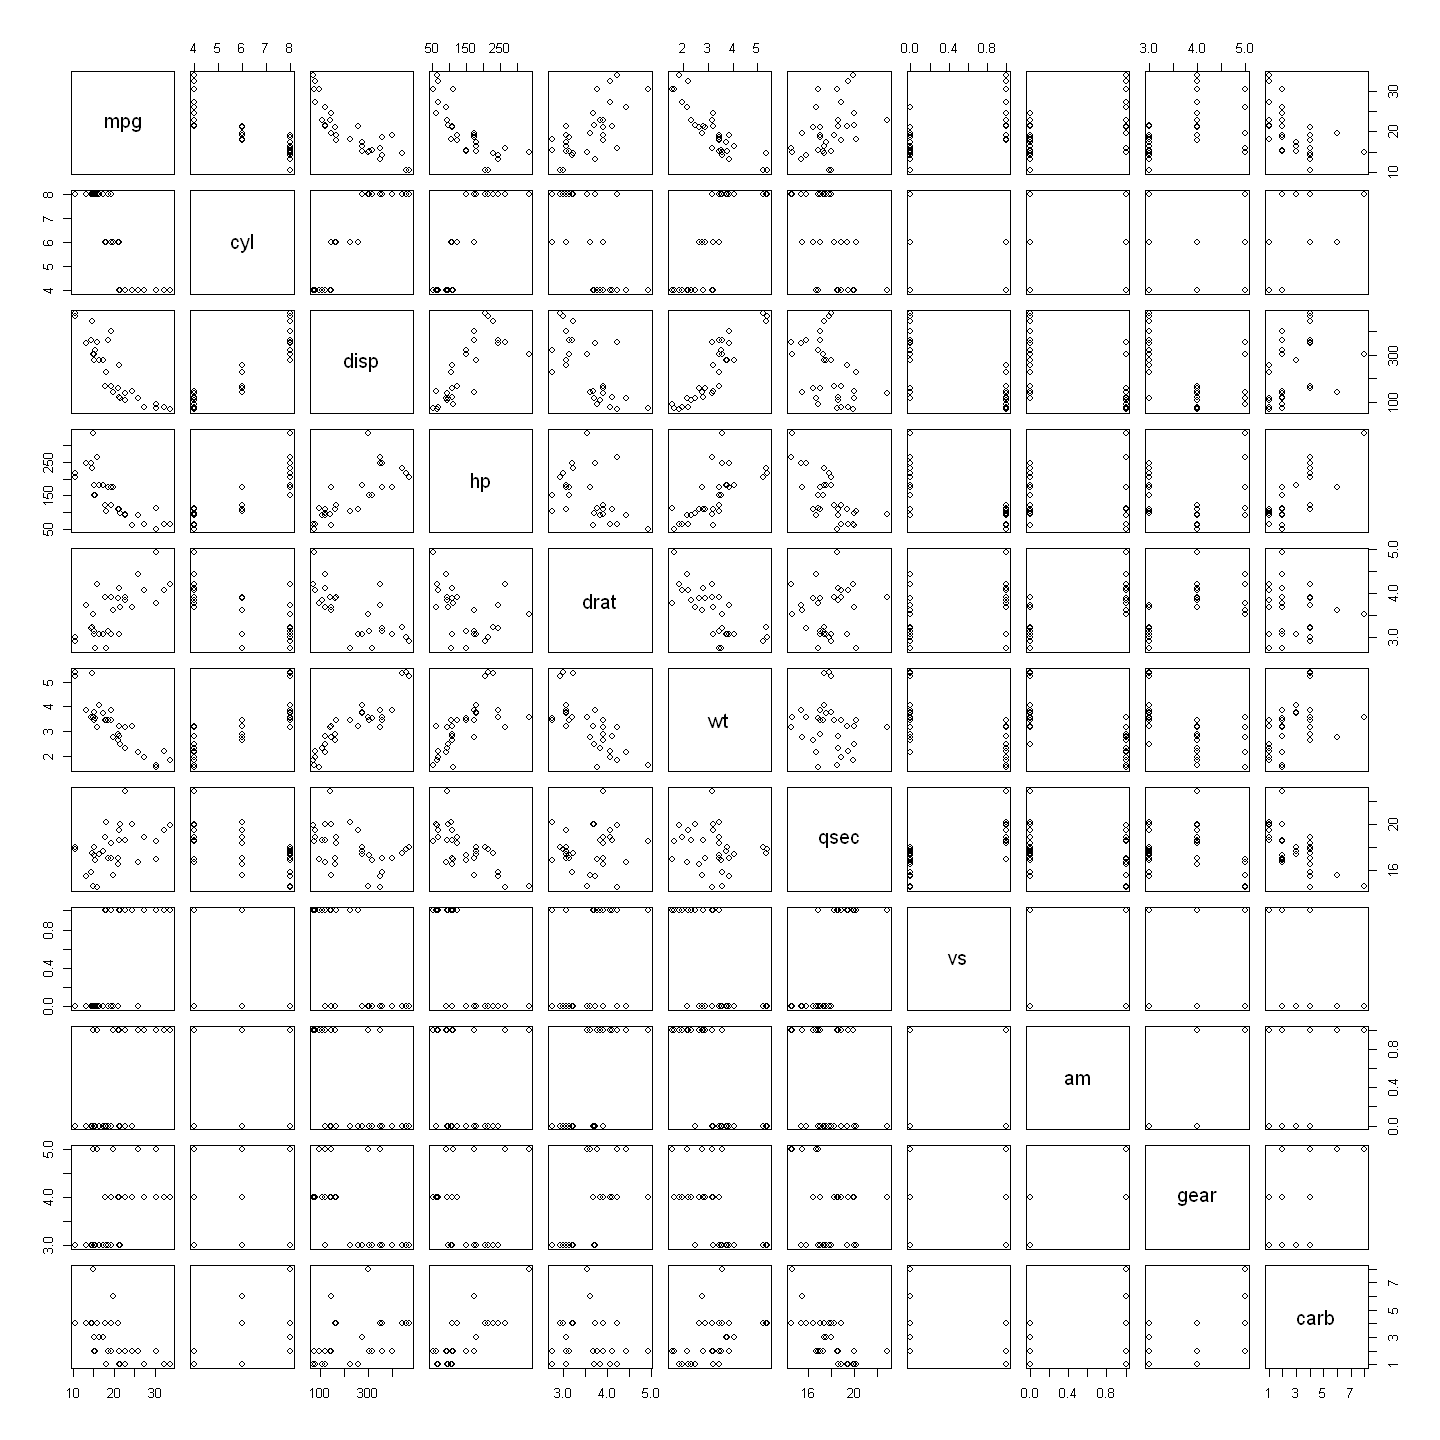

In [3]:
options(repr.plot.width=12, repr.plot.height=12)
df <- mtcars
plot(df)

### Look at the data
 - What is the range of values for each variable?
 - How many are there?
 - What data types are invoved?
 - How many rows are there?
 - Are there NAs?

In [4]:
summary(df)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

In [5]:
colnames(df)

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

## Cut down and explore your data
1. Scatter Plot Matrix (R)
2. Scatter Plot Matrix (enhanced) GGplot
3. Correlation plot (same info in different formats)
4. Visualising Correlation coefficients
5. Combined plots

### 1. Scatter Plot matrix (R)

In [6]:
df1 <- subset(df, select=c(mpg, cyl, wt, am))

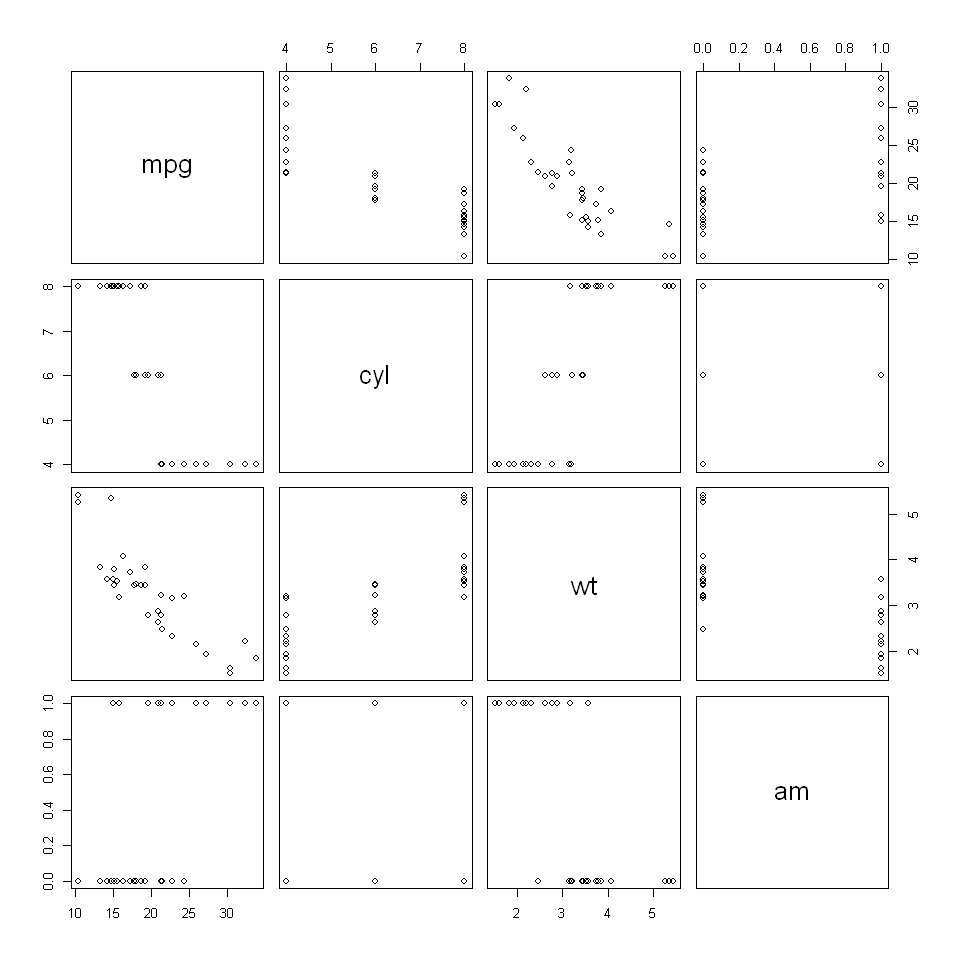

In [7]:
options(repr.plot.width=8, repr.plot.height=8)
plot(df1)

### 2. Scatter Plot Matrix (enhanced) GGplot

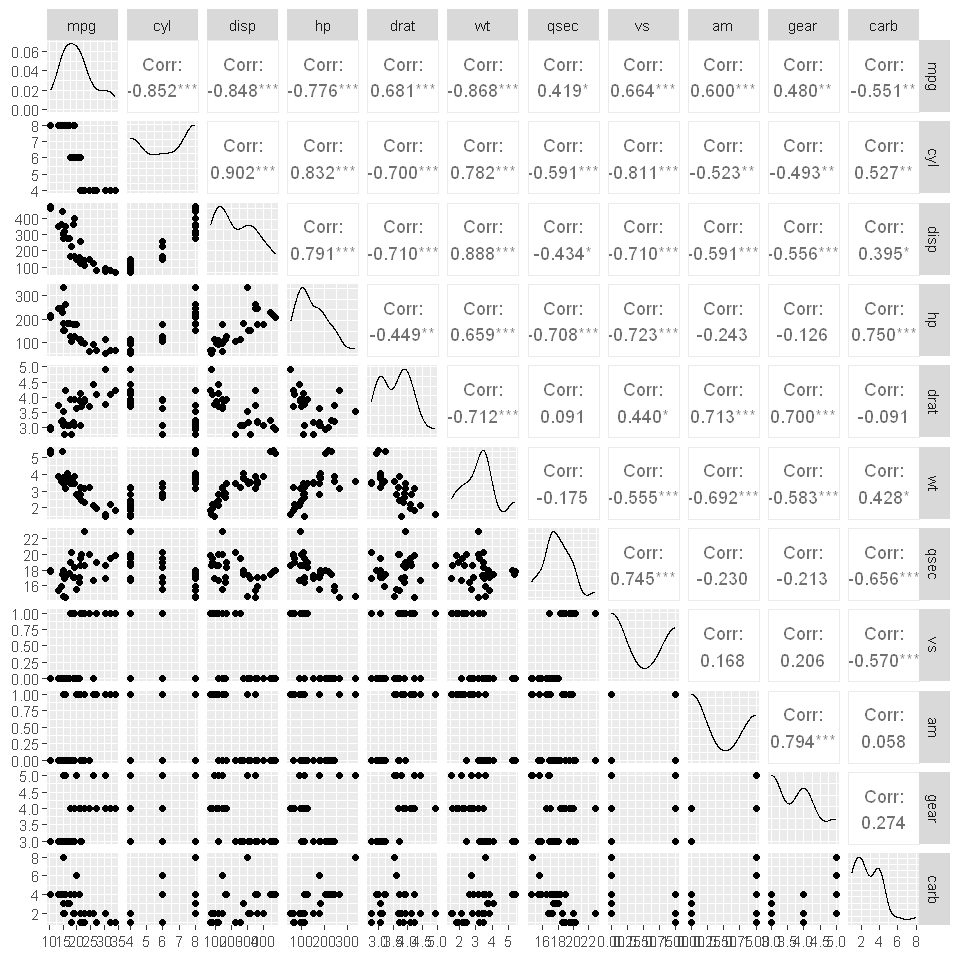

In [8]:
ggpairs(df)

### 3. Correlation plot (same info in different formats)

https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html#:~:text=R%20package%20corrplot%20provides%20a,legend%2C%20text%20labels%2C%20etc.

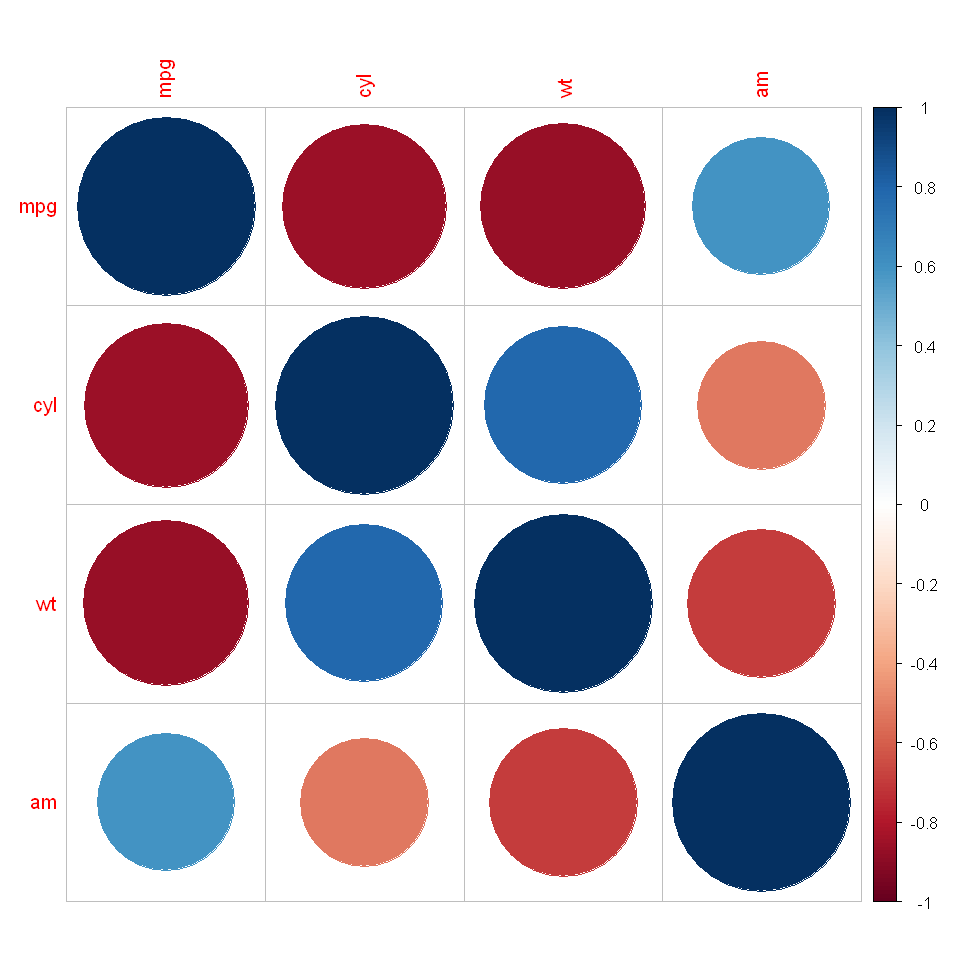

In [9]:

M = cor(df1)
corrplot(M)

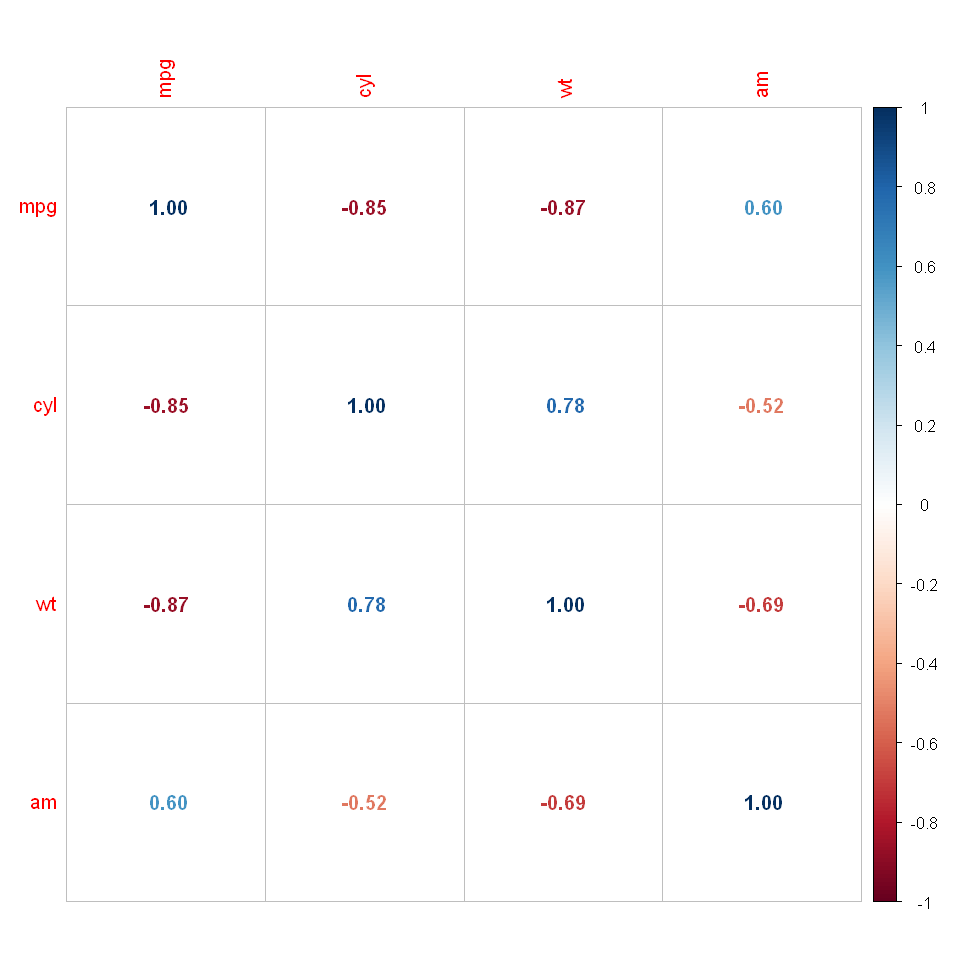

In [10]:
corrplot(M, method = 'number') # colorful number

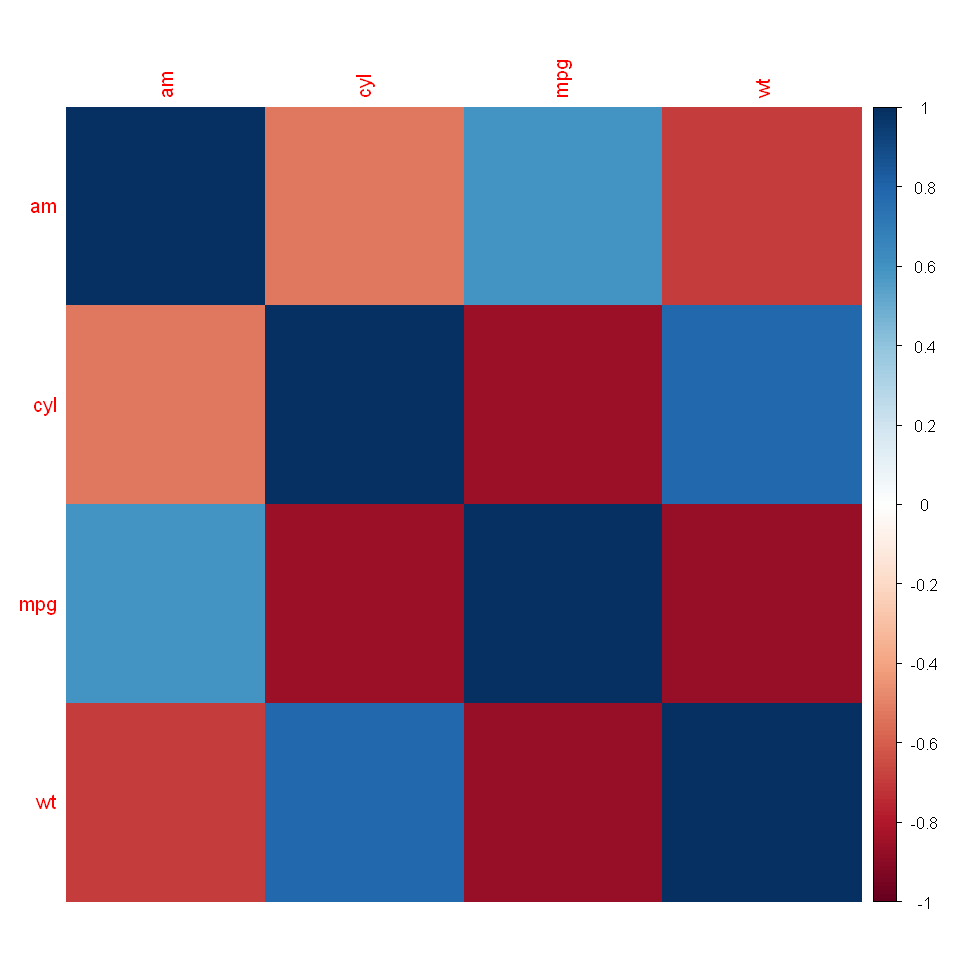

In [11]:
corrplot(M, method = 'color', order = 'alphabet')

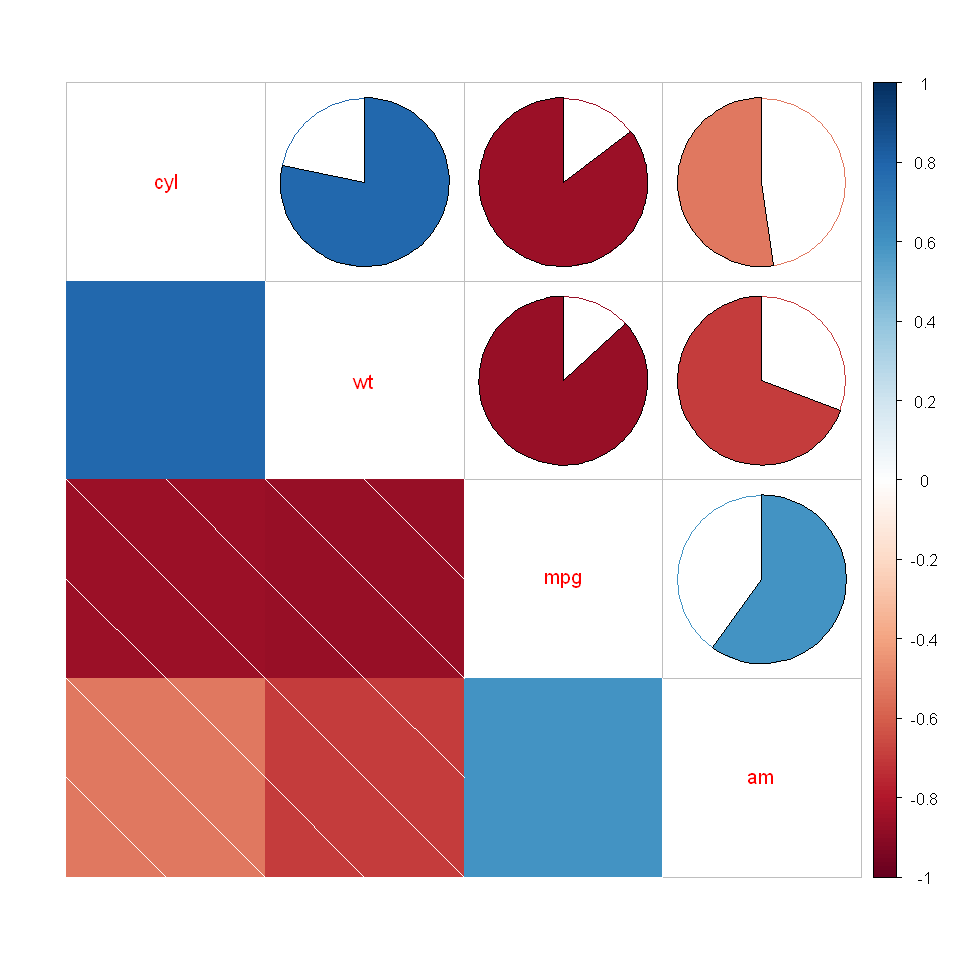

In [12]:
corrplot.mixed(M, lower = 'shade', upper = 'pie', order = 'hclust')

### 4. Visualising Correlation coefficients on a scatter plot 
https://rpkgs.datanovia.com/ggpubr/reference/stat_cor.html

In [13]:
# if(!require(devtools)) install.packages("devtools")
# devtools::install_github("kassambara/ggpubr")

In [14]:
library(ggpubr)

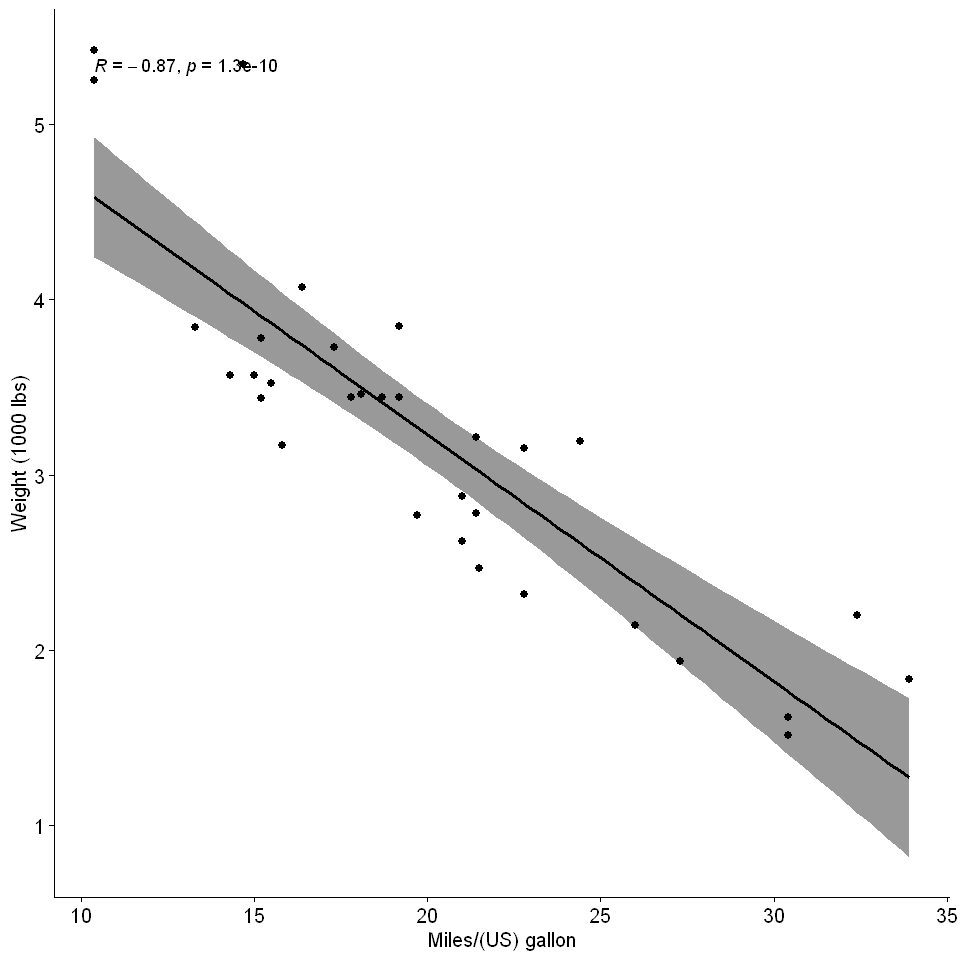

In [15]:
ggscatter(df, x = "mpg", y = "wt", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Miles/(US) gallon", ylab = "Weight (1000 lbs)")

## Q-Q plots
Visual inspection of the data normality using Q-Q plots (quantile-quantile plots). Q-Q plot draws the correlation between a given sample and the normal distribution.

http://www.sthda.com/english/wiki/correlation-test-between-two-variables-in-r

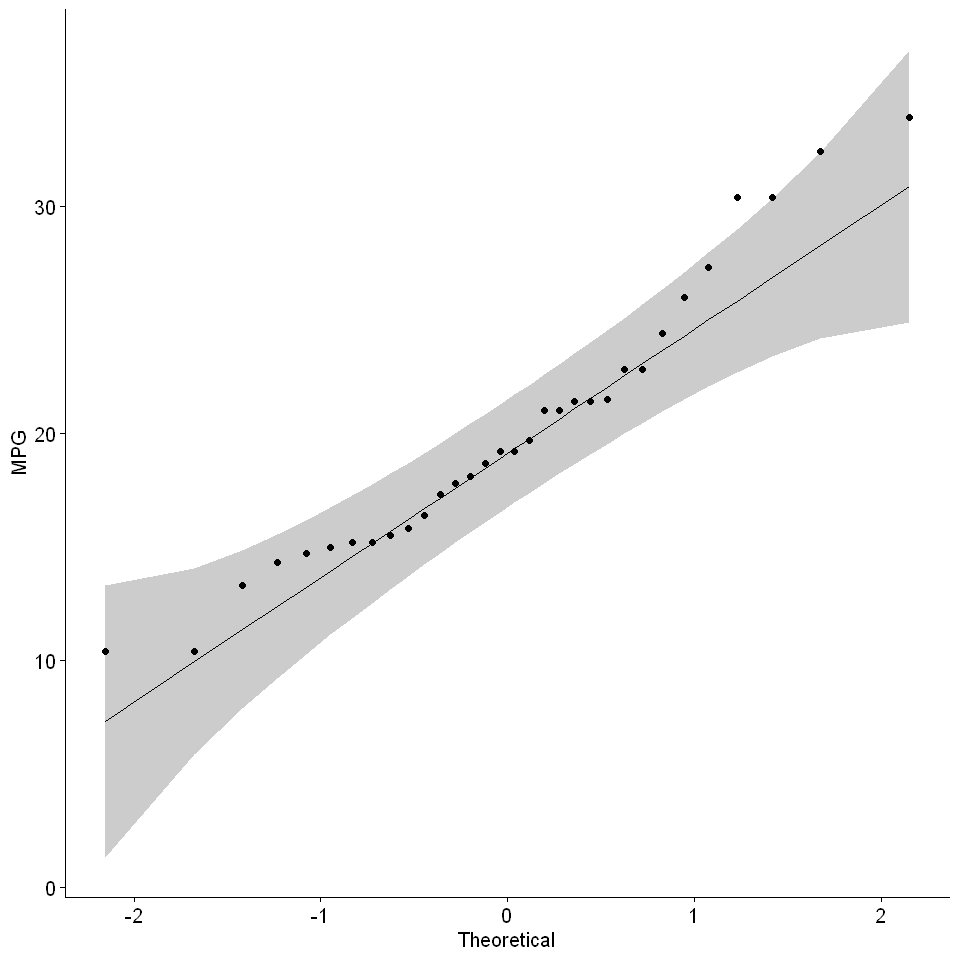

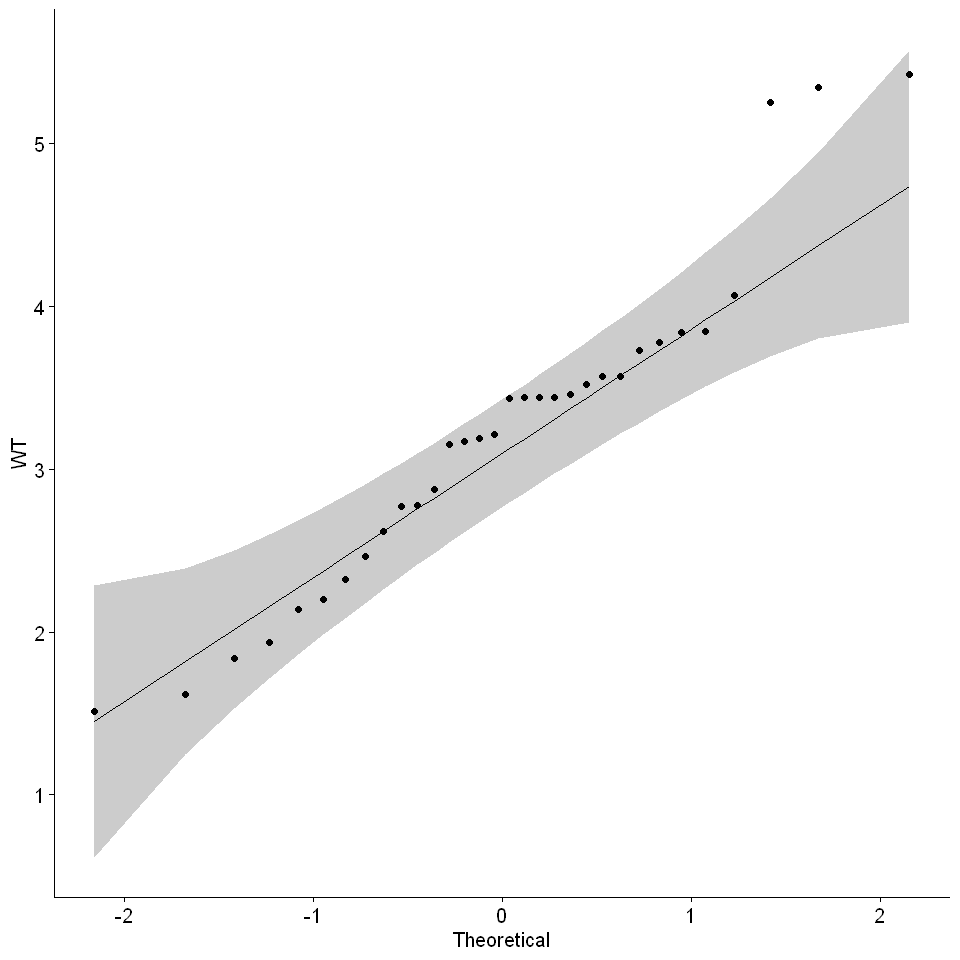

In [16]:
# mpg
ggqqplot(df$mpg, ylab = "MPG")
# wt
ggqqplot(df$wt, ylab = "WT")

### 5. Scatter plot with enhanced plots on borders

https://cran.r-project.org/web/packages/ggExtra/vignettes/ggExtra.html

In [34]:
str(df)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 1 1 1 1 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [52]:
df %>% summarise_all(list(~n_distinct(.)))

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
25,3,27,22,22,29,30,2,2,3,6


In [67]:
unique(df$gear)
unique(df$cyl)
unique(df$am)

[1] 4 3 5

[1] 6 4 8

[1] 2 1

In [68]:
df$NumberOfGears <- as.factor(df$gear)
df$Cylinders <- as.factor(df$cyl)
df$TransmissionMode <- as.factor(df$am)

Warning message:
"Using size for a discrete variable is not advised."


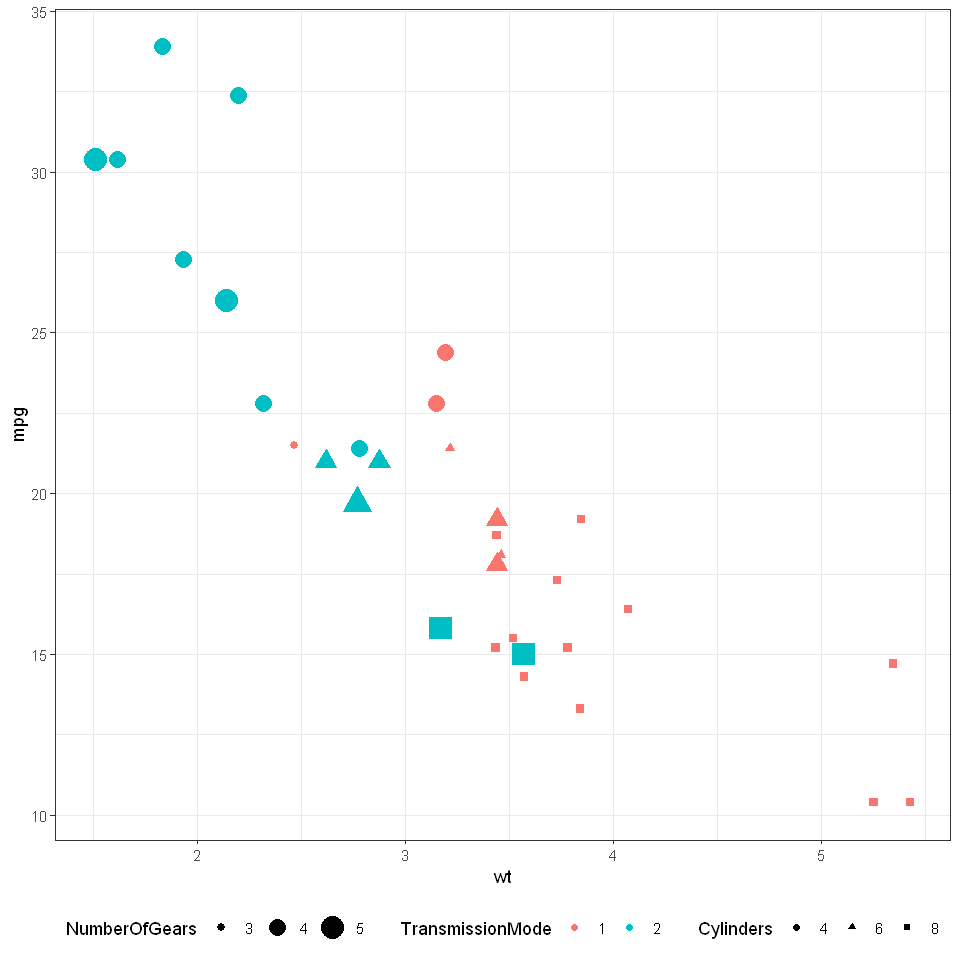

In [83]:
p <- ggplot(df, aes(x=wt, y=mpg, shape = Cylinders, color = TransmissionMode, size = NumberOfGears)) +  # shape = color
  geom_point()+ theme_bw()+
theme(legend.position="bottom") 
p

Warning message:
"Using size for a discrete variable is not advised."
Warning message:
"Using size for a discrete variable is not advised."


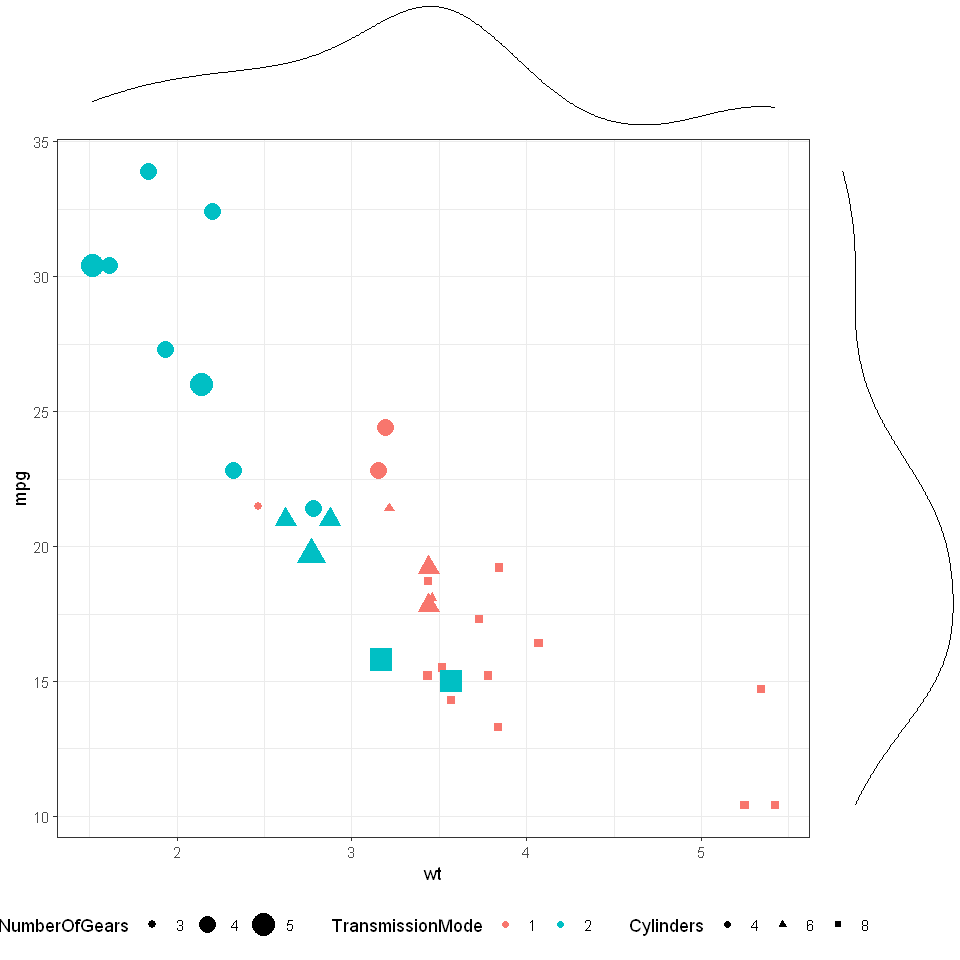

In [85]:
ggMarginal(p, type="density")

Warning message:
"Using size for a discrete variable is not advised."
Warning message:
"Using size for a discrete variable is not advised."


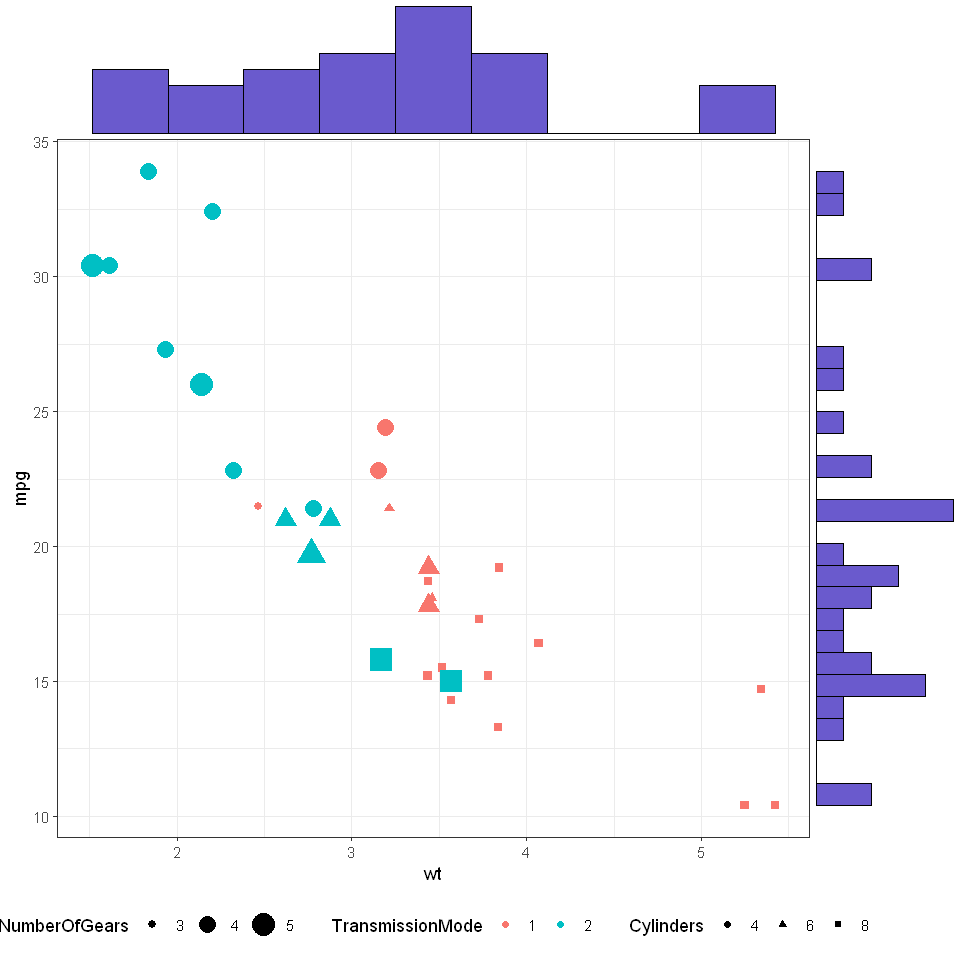

In [86]:
ggMarginal(p, type="histogram",fill = "slateblue", xparams = list(  bins=10))


Warning message:
"Using size for a discrete variable is not advised."
Warning message:
"Using size for a discrete variable is not advised."
Warning message:
"Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?"
Warning message:
"Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?"


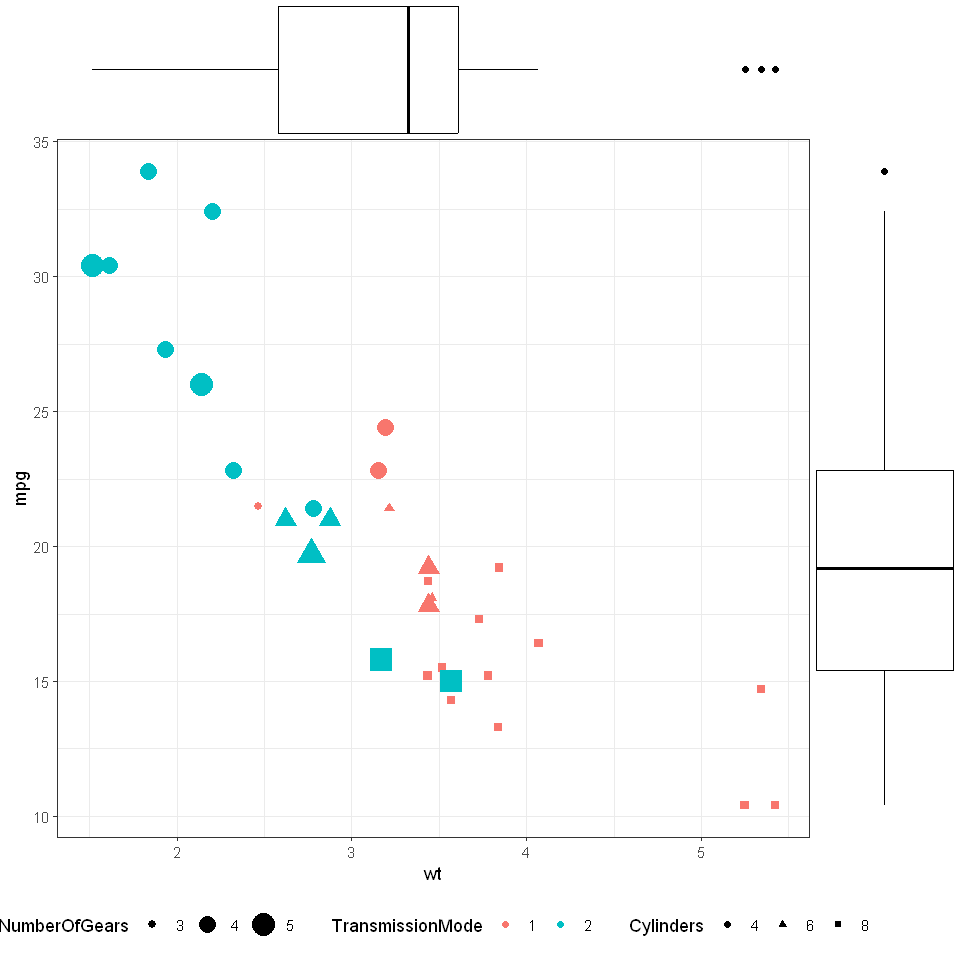

In [89]:
ggMarginal(p, type="boxplot")